In [1]:
from astropy.table import Table
from matplotlib import pyplot
import numpy
import seaborn

from pathlib import Path

from targets import TARGETS

/home/stem/anm83/.conda/envs/pirate-photometry/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1061: UserWarning: Warning: converting a masked element to nan.
  x = np.asanyarray(x)


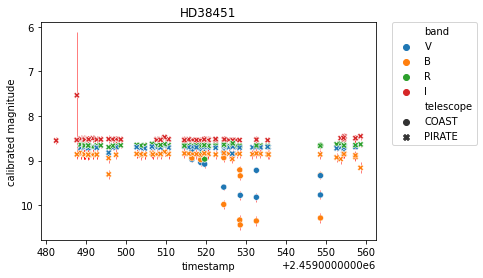

/home/stem/anm83/.conda/envs/pirate-photometry/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1061: UserWarning: Warning: converting a masked element to nan.
  x = np.asanyarray(x)


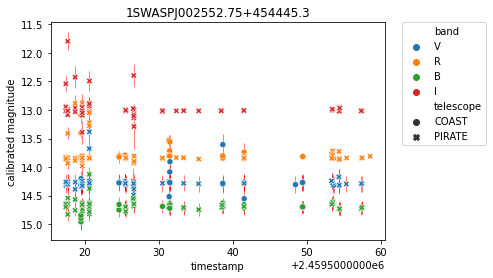

/home/stem/anm83/.conda/envs/pirate-photometry/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1061: UserWarning: Warning: converting a masked element to nan.
  x = np.asanyarray(x)


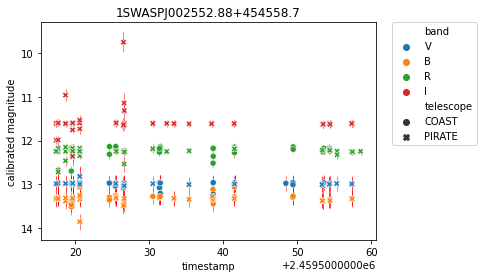

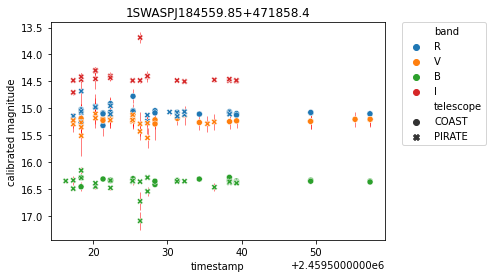

/home/stem/anm83/.conda/envs/pirate-photometry/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1061: UserWarning: Warning: converting a masked element to nan.
  x = np.asanyarray(x)


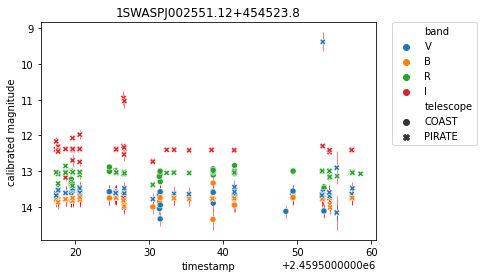

In [2]:
for table in Path('data').glob('target_observations/*.ecsv'):
    if table.stem not in TARGETS:
        continue
    photometry = Table.read(table)
    photometry = photometry[photometry['FLAGS'] == 0]
    try:
        photometry = photometry[photometry['calibrated magnitude'] != None]
        photometry = photometry[photometry['calibrated magnitude err'] != None]
        photometry['calibrated magnitude'].fill_value = numpy.nan
    except KeyError:
        continue
    fig = pyplot.figure()
    mag = seaborn.scatterplot(
        x=photometry['timestamp'],
        y=photometry['calibrated magnitude'],
        hue=photometry['band'],
        style=photometry['telescope'],
    )
    pyplot.errorbar(
        photometry['timestamp'],
        photometry['calibrated magnitude'],
        yerr=photometry['calibrated magnitude err'],
        ecolor='red',
        ls='none',
        zorder=-1,
        alpha=0.5,
        elinewidth=1,
    )
    mag.invert_yaxis()
    mag.set(title=table.stem)
    pyplot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    pyplot.show()